In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#importing the PCA scaling library
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.datasets import make_classification
from numpy import where


In [2]:
dummies_loan_status = pd.read_csv('dummies_loan_status.csv')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', None)
dummies_loan_status.head()

,Unnamed: 0,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,FICO_group_Exeptional,FICO_group_Fair,FICO_group_Good,FICO_group_Very Good
0,0,5000.0,5000.0,0,10.65,162.87,2,6,10,24000.0,...,0,0,0,0,0,0,0,0,1,0
1,1,2500.0,2500.0,1,15.27,59.83,3,13,0,30000.0,...,0,0,0,0,0,0,0,0,0,1
2,2,2400.0,2400.0,0,15.96,84.33,3,14,10,12252.0,...,0,0,0,1,0,0,0,0,1,0
3,3,10000.0,10000.0,0,13.49,339.31,3,10,10,49200.0,...,0,1,0,0,0,0,0,0,1,0
4,4,3000.0,3000.0,1,12.69,67.79,2,9,1,80000.0,...,0,1,0,0,0,0,0,0,1,0


In [3]:
dummies_loan_status.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
dummies_loan_status.shape

(42535, 64)

In [5]:
dummies_loan_status.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'annual_inc', 'issue_d', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'loan_status', 'policy_code', 'FICO_mean', 'is_amnt_outlier',
       'amount_bins', 'is_income_outlier', 'credit_history',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educ

In [6]:
from scipy import stats

z = np.abs(stats.zscore(dummies_loan_status[dummies_loan_status.columns]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outliers - the index numbers and the corresponding column indices in the second vector')
print("\n")
print(np.where(z > 3))

[[0.82173051 0.81456887 0.59064503 ... 0.31744888 0.72629776 0.56059695]
 [1.15907367 1.16437427 1.69306429 ... 0.31744888 1.37684577 1.78381277]
 [1.1725674  1.17836649 0.59064503 ... 0.31744888 0.72629776 0.56059695]
 ...
 [1.15570024 1.16087622 0.59064503 ... 0.31744888 0.72629776 0.56059695]
 [0.61932461 0.60468562 0.59064503 ... 0.31744888 1.37684577 1.78381277]
 [0.82173051 0.81456887 0.59064503 ... 0.31744888 1.37684577 1.78381277]]


*******************************************************************************


Below are the outliers - the index numbers and the corresponding column indices in the second vector


(array([    1,     2,     5, ..., 42533, 42534, 42534], dtype=int64), array([46, 57, 59, ..., 39,  9, 32], dtype=int64))


In [7]:
dummies_loan_status_outliers_removed = dummies_loan_status[(z<3).all(axis=1)]

In [8]:
# define dataset
X = dummies_loan_status.drop('loan_status', axis = 1)
y = dummies_loan_status.loan_status

In [9]:
X.shape, y.shape

((42535, 63), (42535,))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [12]:
X_scaled_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,FICO_group_Exeptional,FICO_group_Fair,FICO_group_Good,FICO_group_Very Good
0,-0.821731,-0.814569,-0.590645,-0.408592,-0.764644,-0.466389,-0.622967,1.442745,-0.704100,0.795288,...,-0.122514,-0.340751,-0.049983,-0.22166,-0.097434,-0.155482,-0.122019,-0.317449,0.726298,-0.560597
1,-1.159074,-1.164374,1.693064,0.837399,-1.257836,0.228822,0.366964,-1.328770,-0.610491,0.795288,...,-0.122514,-0.340751,-0.049983,-0.22166,-0.097434,-0.155482,-0.122019,-0.317449,-1.376846,1.783813
2,-1.172567,-1.178366,-0.590645,1.023488,-1.140569,0.228822,0.508382,1.442745,-0.887387,0.795288,...,-0.122514,-0.340751,-0.049983,4.51142,-0.097434,-0.155482,-0.122019,-0.317449,0.726298,-0.560597
3,-0.147044,-0.114958,-0.590645,0.357342,0.079871,0.228822,-0.057292,1.442745,-0.310940,0.795288,...,-0.122514,2.934694,-0.049983,-0.22166,-0.097434,-0.155482,-0.122019,-0.317449,0.726298,-0.560597
4,-1.091605,-1.094413,1.693064,0.141586,-1.219736,-0.466389,-0.198711,-1.051618,0.169588,0.795288,...,-0.122514,2.934694,-0.049983,-0.22166,-0.097434,-0.155482,-0.122019,-0.317449,0.726298,-0.560597


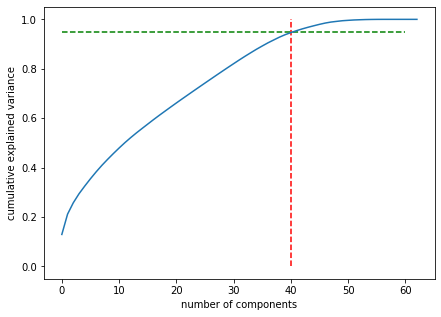

In [13]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gcf().set_size_inches(7, 5)

In [14]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 40)
X_pca_final = pca_final.fit_transform(X_scaled)
loans_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1]})
loans_pca.head()

,PC1,PC2
0,0.326289,-0.060733
1,0.328712,-0.059565
2,0.155233,0.063825
3,0.163116,0.347915
4,0.308193,-0.047592


In [15]:
X_pca_final.shape

(42535, 40)

In [16]:
loans_pca.shape

(63, 2)

In [17]:
print(X.shape)
print(X_pca_final.shape)

(42535, 63)
(42535, 40)


In [18]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [19]:
corrmat.shape

(40, 40)

In [20]:
## Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [21]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

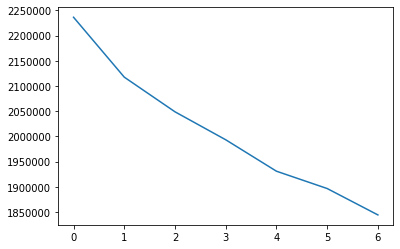

In [22]:
# elbow-curve
ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_) 
plt.plot(ssd)

In [23]:
# Silhouette score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.12917262509301794
For n_clusters=3, the silhouette score is 0.09427658023034062
For n_clusters=4, the silhouette score is 0.09220759489990747
For n_clusters=5, the silhouette score is 0.05990658808661583
For n_clusters=6, the silhouette score is 0.10355744486289592
For n_clusters=7, the silhouette score is 0.10577255669183344
For n_clusters=8, the silhouette score is 0.10667271499166904


In [24]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42)
groups = kmeans.fit(X_pca_final)

In [25]:
dummies_loan_status['K-Means_Cluster_ID'] = kmeans.labels_
dummies_loan_status.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,FICO_group_Exeptional,FICO_group_Fair,FICO_group_Good,FICO_group_Very Good,K-Means_Cluster_ID
0,5000.0,5000.0,0,10.65,162.87,2,6,10,24000.0,2011,...,0,0,0,0,0,0,0,1,0,1
1,2500.0,2500.0,1,15.27,59.83,3,13,0,30000.0,2011,...,0,0,0,0,0,0,0,0,1,1
2,2400.0,2400.0,0,15.96,84.33,3,14,10,12252.0,2011,...,0,0,1,0,0,0,0,1,0,1
3,10000.0,10000.0,0,13.49,339.31,3,10,10,49200.0,2011,...,1,0,0,0,0,0,0,1,0,1
4,3000.0,3000.0,1,12.69,67.79,2,9,1,80000.0,2011,...,1,0,0,0,0,0,0,1,0,1


In [26]:
# checking the size of the groups
(dummies_loan_status['K-Means_Cluster_ID'].value_counts(normalize = True, sort = True) * 100).to_string()

'1    52.331022\n0    24.676149\n2    22.992829'

In [27]:
# checking the means
dummies_loan_status.agg(['mean'])

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,FICO_group_Exeptional,FICO_group_Fair,FICO_group_Good,FICO_group_Very Good,K-Means_Cluster_ID
mean,11089.722581,10821.585753,0.258634,12.165016,322.623063,2.670859,10.405125,4.794381,69130.054805,2010.231456,...,0.104032,0.002492,0.046832,0.009404,0.023604,0.01467,0.091548,0.654661,0.239121,0.983167


In [28]:
dummies_loan_status.groupby('K-Means_Cluster_ID').agg(['mean'])

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,FICO_group_Exeptional,FICO_group_Fair,FICO_group_Good,FICO_group_Very Good
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
K-Means_Cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,20855.887957,20281.838319,0.541730,14.839970,581.696358,3.610137,15.107470,5.790492,97402.946049,2010.457603,...,0.003620,0.046684,0.001524,0.067073,0.001143,0.016006,0.006383,0.078316,0.750191,0.165111
1,7162.552226,7060.760816,0.166809,12.686357,222.940225,2.838986,11.268970,4.181500,56072.240953,2010.109349,...,0.019633,0.127454,0.002651,0.037333,0.011726,0.026821,0.000000,0.138012,0.860012,0.001977
2,9546.697342,9228.271984,0.163804,8.107670,271.458133,1.280164,3.392434,5.120245,68506.497751,2010.266667,...,0.015746,0.112270,0.003170,0.046728,0.012986,0.024438,0.056953,0.000000,0.084765,0.858282


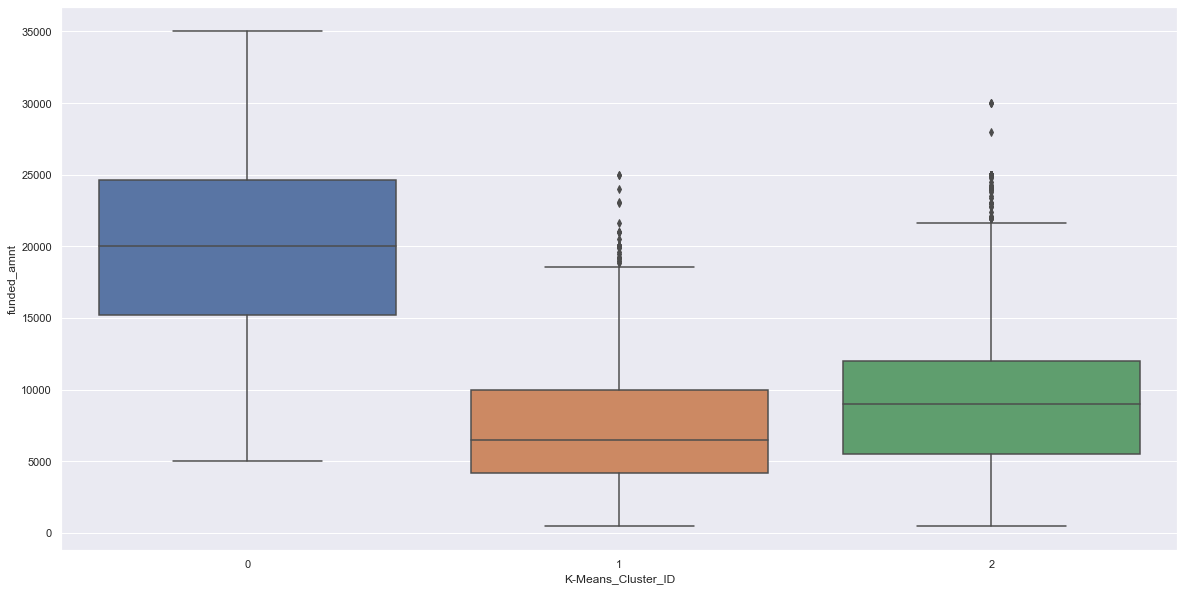

In [29]:
sns.set(font_scale= 1)
plt.figure(figsize=(20,10))
sns.boxplot(x='K-Means_Cluster_ID', y='funded_amnt', data=dummies_loan_status)

We can observe 3 different custers in funded amount feature

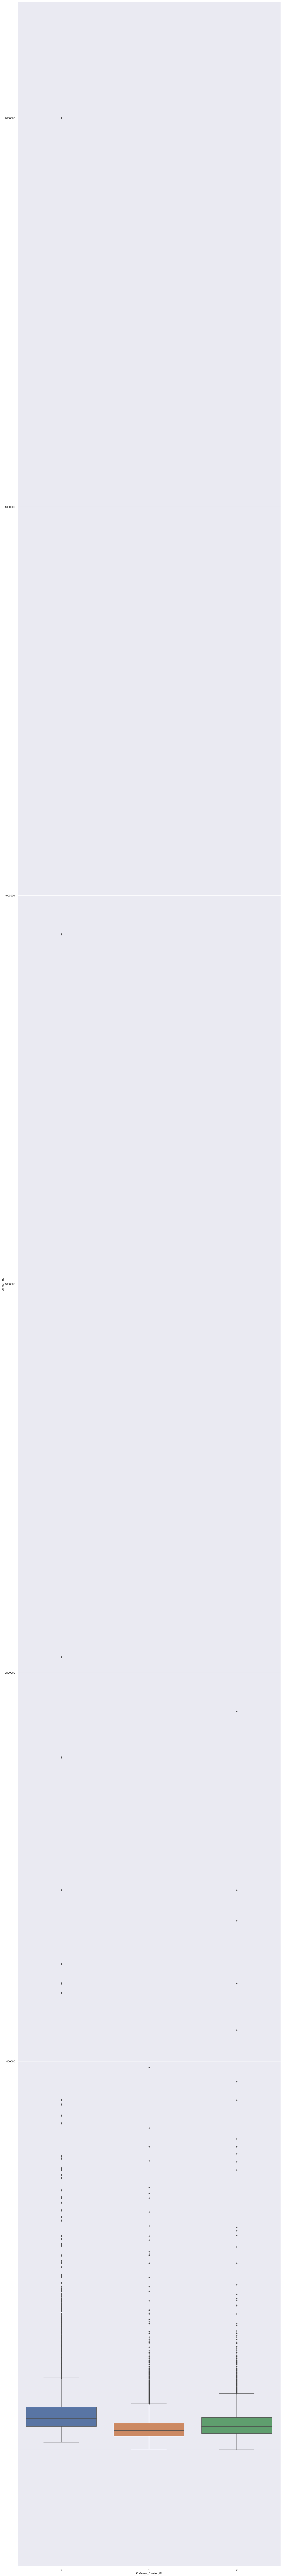

In [30]:
sns.set(font_scale= 1)
plt.figure(figsize=(20,200))
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=dummies_loan_status)

Concerning annual income feature the differences are not so visible, but we have enormous spread of data here.

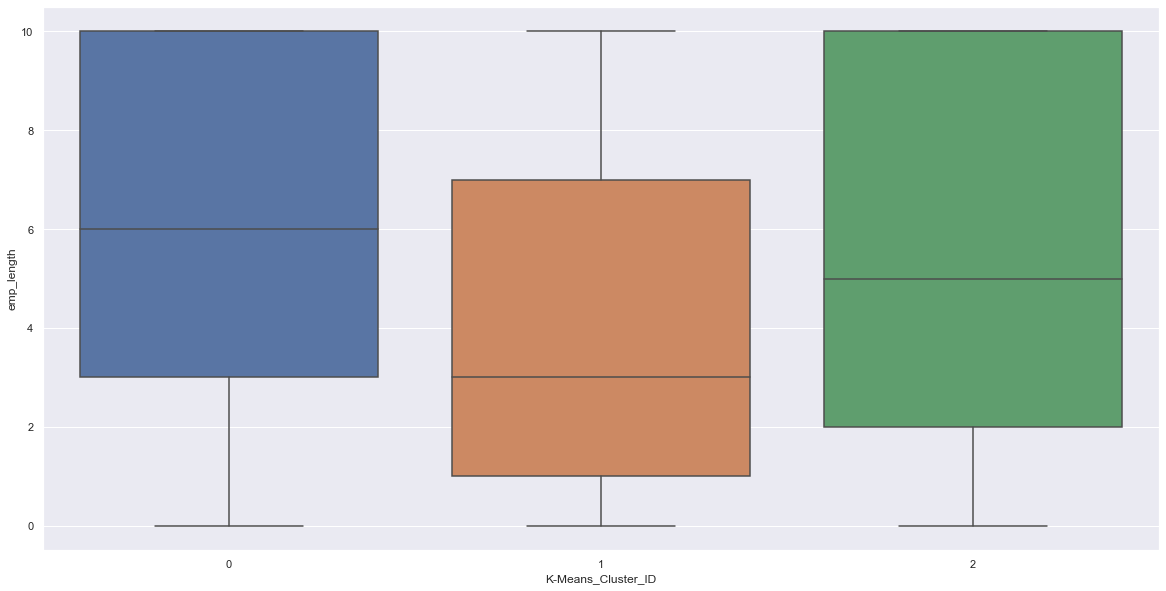

In [31]:
sns.set(font_scale= 1)
plt.figure(figsize=(20,10))
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=dummies_loan_status)

Also three different cluster related to employment length

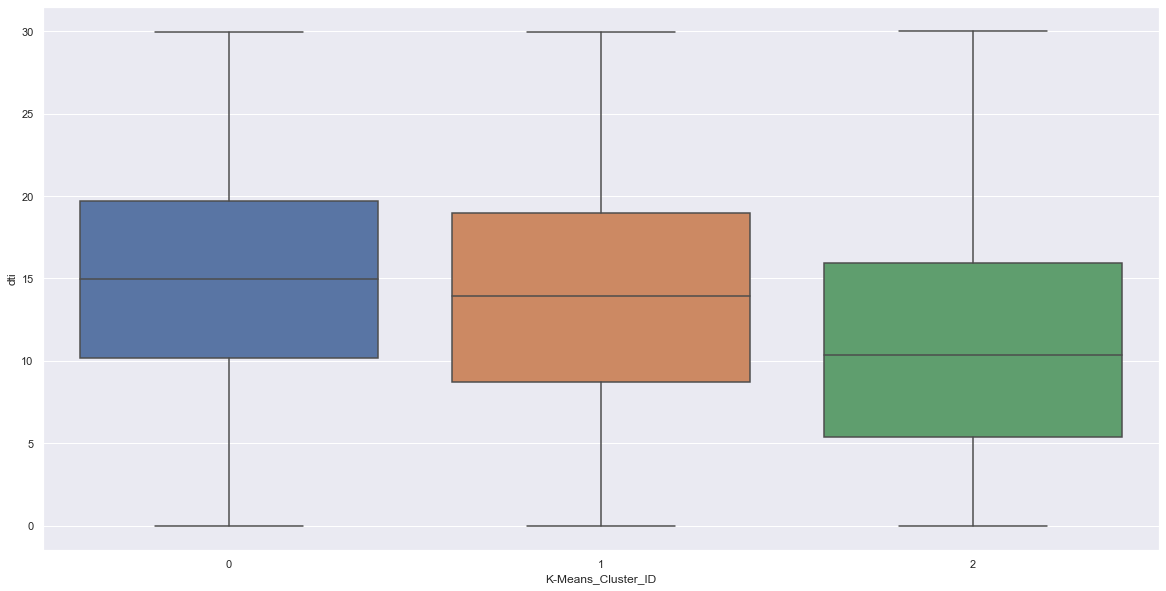

In [32]:
sns.set(font_scale= 1)
plt.figure(figsize=(20,10))
sns.boxplot(x='K-Means_Cluster_ID', y='dti', data=dummies_loan_status)

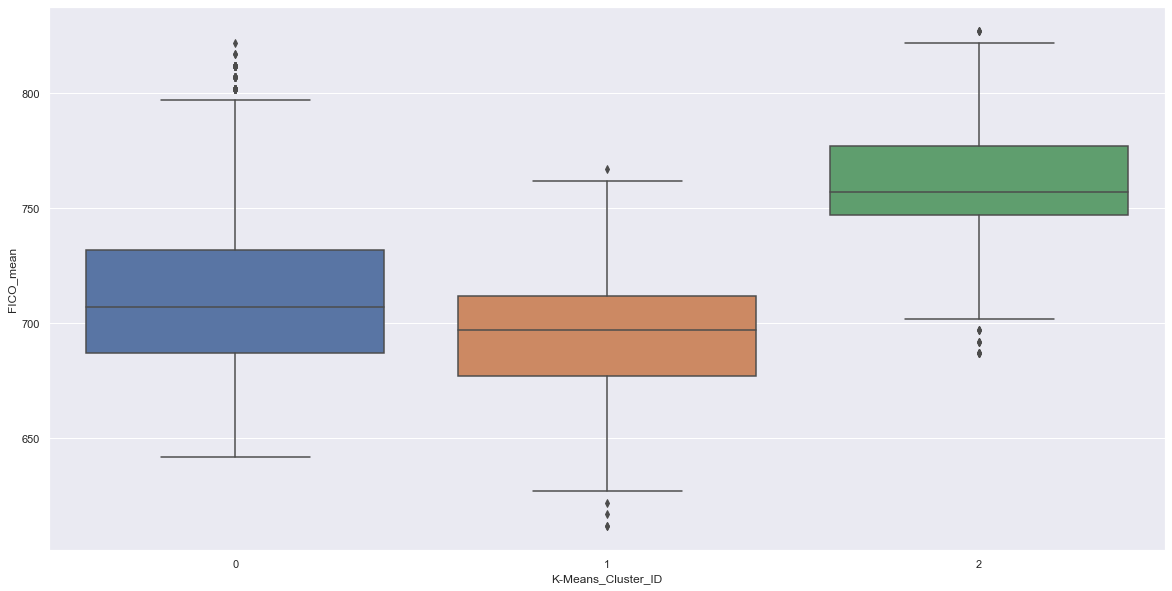

In [33]:
sns.set(font_scale= 1)
plt.figure(figsize=(20,10))
sns.boxplot(x='K-Means_Cluster_ID', y='FICO_mean', data=dummies_loan_status)

There we have very clear division between Clusters

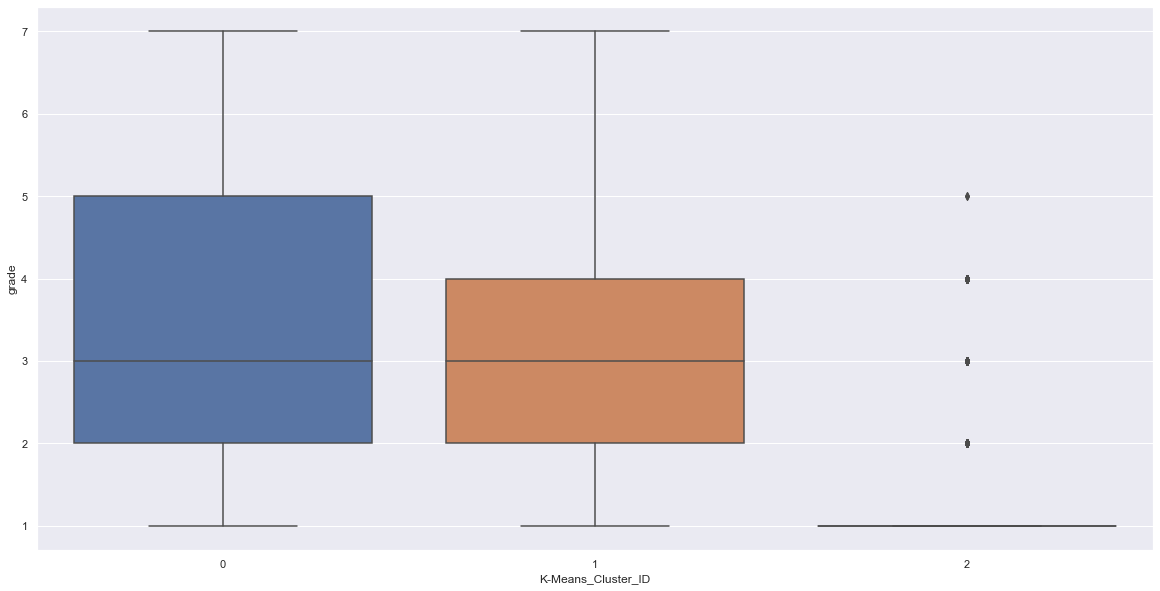

In [34]:
sns.set(font_scale= 1)
plt.figure(figsize=(20,10))
sns.boxplot(x='K-Means_Cluster_ID', y='grade', data=dummies_loan_status)